In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/

In [ ]:
# Tomato = '/content/drive/MyDrive/PlantVillage'

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train', output="Output", seed=1337, ratio=(0.8, 0.1,0.1))

Copying files: 31410 files [08:41, 60.20 files/s] 


In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
dataset = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/Output/train',
        shuffle = True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 25121 images belonging to 17 classes.


In [ ]:
train_generator.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Potato___Early_blight': 4,
 'Potato___Late_blight': 5,
 'Potato___healthy': 6,
 'Tomato___Bacterial_spot': 7,
 'Tomato___Early_blight': 8,
 'Tomato___Late_blight': 9,
 'Tomato___Leaf_Mold': 10,
 'Tomato___Septoria_leaf_spot': 11,
 'Tomato___Spider_mites Two-spotted_spider_mite': 12,
 'Tomato___Target_Spot': 13,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 14,
 'Tomato___Tomato_mosaic_virus': 15,
 'Tomato___healthy': 16}

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.66658103 0.6195222  0.6352085 ]
  [0.6692146  0.6221558  0.63784206]
  [0.6718482  0.62478936 0.64047563]
  ...
  [0.707169   0.6601102  0.67579645]
  [0.7045742  0.6575154  0.6732017 ]
  [0.7110969  0.66403806 0.67972434]]

 [[0.6549169  0.60785806 0.62354434]
  [0.651625   0.6045661  0.6202524 ]
  [0.64833295 0.60127413 0.6169604 ]
  ...
  [0.7062911  0.65923226 0.67491853]
  [0.7047937  0.6577349  0.67342114]
  [0.7115358  0.664477   0.68016326]]

 [[0.68630546 0.63924664 0.6549329 ]
  [0.68762225 0.6405634  0.6562497 ]
  [0.68893903 0.6418802  0.6575665 ]
  ...
  [0.7054133  0.65835446 0.67404073]
  [0.7050131  0.6579543  0.67364055]
  [0.71197474 0.6649159  0.6806022 ]]

 ...

 [[0.47314355 0.39863375 0.40647689]
  [0.41701993 0.34251013 0.35035327]
  [0.37780285 0.30329305 0.3111362 ]
  ...
  [0.37074766 0.29623786 0.304081  ]
  [0.37228394 0.2977741  0.30561724]
  [0.37382016 0.29931036 0.3071535 ]]

 [[0.46985155 0.39534175 0.4031849 ]
  [0.41438636 0.33987656 0.3477197 ]


In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/Output/val',
        shuffle = True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3133 images belonging to 17 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/Output/test',
        shuffle = True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3156 images belonging to 17 classes.


In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5513739  0.53411883 0.5921579 ]
  [0.5456218  0.5292517  0.5877332 ]
  [0.5464038  0.53071755 0.5895411 ]
  ...
  [0.39484432 0.3477855  0.40268746]
  [0.4040463  0.35698748 0.41188943]
  [0.49568337 0.46431032 0.5003894 ]]

 [[0.5982319  0.5747025  0.62960446]
  [0.5946921  0.5711627  0.62606466]
  [0.5905245  0.56724626 0.6222738 ]
  ...
  [0.39086208 0.34380326 0.3987052 ]
  [0.40625864 0.35919982 0.41410178]
  [0.5080726  0.47891188 0.5123361 ]]

 [[0.6249981  0.6014687  0.6563707 ]
  [0.62411314 0.60058373 0.65548575]
  [0.6223246  0.5987952  0.65369713]
  ...
  [0.38898835 0.34192953 0.39683148]
  [0.411359   0.36492804 0.4190766 ]
  [0.51784813 0.49039716 0.5217697 ]]

 ...

 [[0.6544999  0.6388136  0.7054803 ]
  [0.3664058  0.35071954 0.4173862 ]
  [0.4096562  0.39396992 0.4606366 ]
  ...
  [0.66138965 0.62609553 0.69276226]
  [0.64085543 0.6055613  0.672228  ]
  [0.60767007 0.57237595 0.6390426 ]]

 [[0.62891406 0.6132278  0.67989445]
  [0.36129943 0.34561315 0.4122798 ]


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 17

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=55,
)

Epoch 1/55
47/47 [==============================] - 42s 722ms/step - loss: 2.8310 - accuracy: 0.0751 - val_loss: 2.8390 - val_accuracy: 0.0469
Epoch 2/55
47/47 [==============================] - 35s 747ms/step - loss: 2.7895 - accuracy: 0.0904 - val_loss: 2.6590 - val_accuracy: 0.0938
Epoch 3/55
47/47 [==============================] - 33s 697ms/step - loss: 2.5275 - accuracy: 0.1848 - val_loss: 2.6162 - val_accuracy: 0.1667
Epoch 4/55
47/47 [==============================] - 33s 695ms/step - loss: 2.3340 - accuracy: 0.2281 - val_loss: 2.1815 - val_accuracy: 0.2812
Epoch 5/55
47/47 [==============================] - 35s 758ms/step - loss: 2.0975 - accuracy: 0.3085 - val_loss: 1.8521 - val_accuracy: 0.3750
Epoch 6/55
47/47 [==============================] - 33s 711ms/step - loss: 1.8653 - accuracy: 0.3664 - val_loss: 1.8399 - val_accuracy: 0.4167
Epoch 7/55
47/47 [==============================] - 32s 677ms/step - loss: 1.6737 - accuracy: 0.4202 - val_loss: 1.5209 - val_accuracy: 0.5208

In [ ]:
# from tensorflow.keras.applications import VGG16

# # Load the pre-trained VGG16 model without the top (fully connected) layers
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# # Freeze the initial layers of the base model
# base_model.trainable = True
# set_trainable = False
# for layer in base_model.layers:
#     if layer.name == 'block5_conv1':  # You can adjust the layer name based on your requirements
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

# # Create a new model on top of the VGG16 base model
# model = models.Sequential([
#     base_model,
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(n_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=47,
#     batch_size=32,
#     validation_data=validation_generator,
#     validation_steps=6,
#     verbose=1,
#     epochs=20
# )


In [ ]:
scores = model.evaluate(test_generator)

99/99 [==============================] - 53s 534ms/step - loss: 0.3278 - accuracy: 0.8888


In [ ]:
scores

[0.32781198620796204, 0.8887832760810852]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 55, 'steps': 47}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

55

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.831014394760132,
 2.789479970932007,
 2.527452230453491,
 2.333953857421875,
 2.0974555015563965]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_acc

[0.046875,
 0.09375,
 0.1666666716337204,
 0.28125,
 0.375,
 0.4166666567325592,
 0.5208333134651184,
 0.5,
 0.59375,
 0.546875,
 0.578125,
 0.5364583134651184,
 0.6770833134651184,
 0.6041666865348816,
 0.6614583134651184,
 0.6979166865348816,
 0.6614583134651184,
 0.6979166865348816,
 0.734375,
 0.78125,
 0.7395833134651184,
 0.796875,
 0.8020833134651184,
 0.8177083134651184,
 0.71875,
 0.8229166865348816,
 0.8020833134651184,
 0.828125,
 0.7708333134651184,
 0.796875,
 0.78125,
 0.84375,
 0.8333333134651184,
 0.8229166865348816,
 0.8645833134651184,
 0.7916666865348816,
 0.8177083134651184,
 0.7864583134651184,
 0.8489583134651184,
 0.8177083134651184,
 0.875,
 0.8697916865348816,
 0.828125,
 0.8645833134651184,
 0.8333333134651184,
 0.8958333134651184,
 0.8333333134651184,
 0.8958333134651184,
 0.8489583134651184,
 0.8802083134651184,
 0.8541666865348816,
 0.859375,
 0.875,
 0.8802083134651184,
 0.8177083134651184]

In [ ]:
acc

[0.07513298094272614,
 0.0904255285859108,
 0.18484042584896088,
 0.22805851697921753,
 0.3085106313228607,
 0.36635637283325195,
 0.4202127754688263,
 0.48138296604156494,
 0.4820478856563568,
 0.5644946694374084,
 0.5930851101875305,
 0.5651595592498779,
 0.6283244490623474,
 0.6276595592498779,
 0.664893627166748,
 0.6954787373542786,
 0.6981382966041565,
 0.7240691781044006,
 0.7293882966041565,
 0.7466755509376526,
 0.761303186416626,
 0.7619680762290955,
 0.7985372543334961,
 0.7553191781044006,
 0.769946813583374,
 0.7839095592498779,
 0.8144946694374084,
 0.8018617033958435,
 0.8005319237709045,
 0.8251329660415649,
 0.8105053305625916,
 0.8317819237709045,
 0.8317819237709045,
 0.8297872543334961,
 0.8397606611251831,
 0.8085106611251831,
 0.8610372543334961,
 0.8251329660415649,
 0.8404255509376526,
 0.8683510422706604,
 0.8464095592498779,
 0.8683510422706604,
 0.8630319237709045,
 0.8597074747085571,
 0.845079779624939,
 0.8510638475418091,
 0.865026593208313,
 0.8663563728

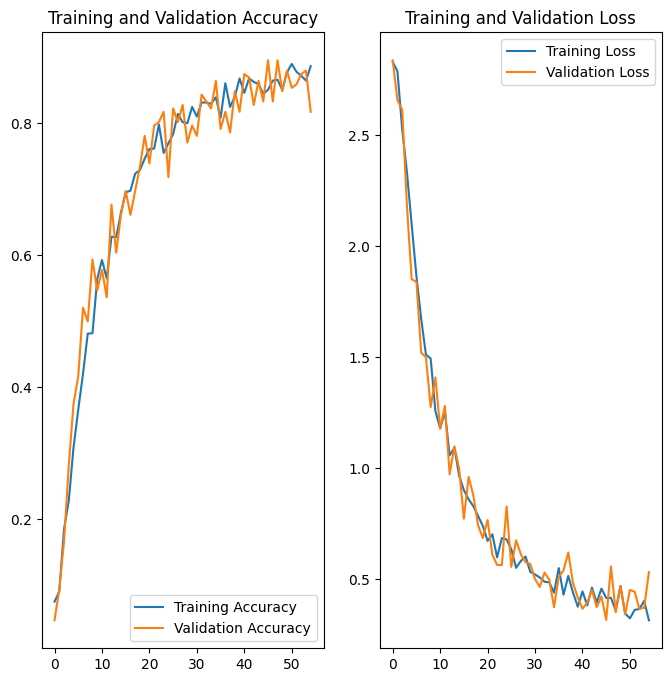

In [ ]:
EPOCHS = 55

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato___Septoria_leaf_spot
1/1 [==============================] - 0s 170ms/step
predicted label: Tomato___Septoria_leaf_spot


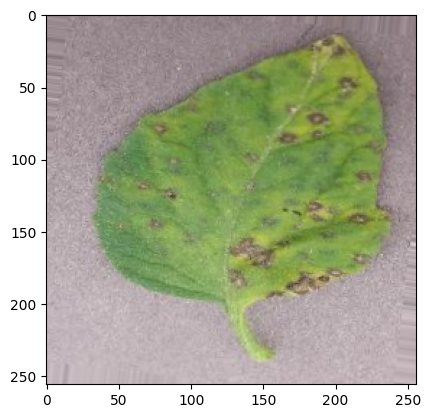

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


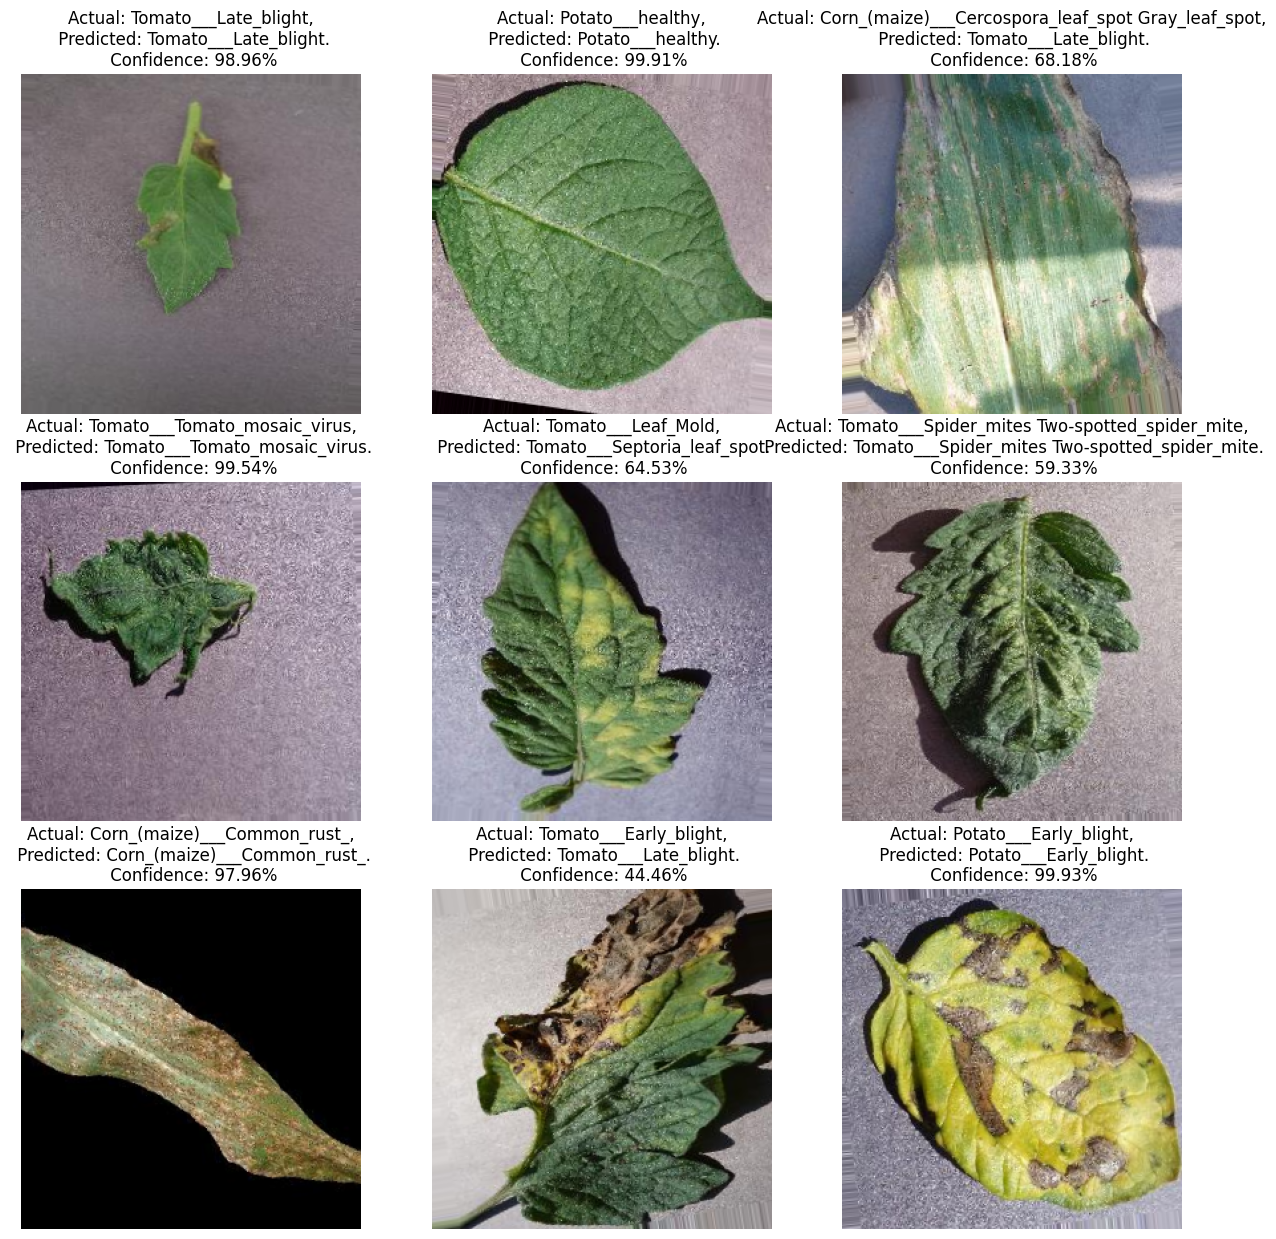

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [ ]:
# model_version = 3
# model.save(f"/content/Models{model_version}")

In [ ]:
# model_version = 5
# model.save(f"/content/drive/MyDrive/Models/model{model_version}")

In [ ]:
# import os
# model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
# model.save(f"../models/{model_version}")

In [ ]:
# model.save("../model3.h5")

In [ ]:
# from google.colab import files
# files.download('../model5.h5')

In [ ]:
# files.download('../model5.h5')